### Песочница для создания скрипта `adj_mol_representation.py`

In [5]:
from pathlib import Path
from collections import Counter
from random import choice

import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolToImage, MolsToGridImage
from rdkit.Chem.rdDistGeom import GetMoleculeBoundsMatrix
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

PROJECT_DIR = Path("./").resolve().parent
# df = pd.read_csv(PROJECT_DIR / "data" / "raw" / "test.csv", index_col=0)
df = pd.read_csv(PROJECT_DIR / "data" / "raw" / "train.csv", index_col=0)

In [6]:
def update_maximum(curr_counter, max_coutnter) -> Counter:
    new_counter = Counter()
    atoms = set(list(curr_counter.keys()) + list(max_coutnter.keys()))
    for atom in atoms:
        new_counter[atom] = max(curr_counter[atom], max_coutnter[atom])
    return new_counter

max_coutnter = Counter()
for smiles in df['Smiles'].to_list():
    mol = Chem.MolFromSmiles(smiles)
    mol_seq = [item.GetSymbol() for item in mol.GetAtoms()]
    curr_counter = Counter(mol_seq)

    if curr_counter["H"] == 6:
        print(smiles)

    max_coutnter = update_maximum(curr_counter, max_coutnter)

len(max_coutnter)

15

In [ ]:
# old_max_coutnter = max_coutnter.copy()

In [12]:
max_coutnter = update_maximum(old_max_coutnter, max_coutnter)

In [13]:
# for atom in old_max_coutnter:
#     if old_max_coutnter[atom] >= max_coutnter[atom]:
#         print("cool")
#     else:
#         print("not cool")
#         print(atom)

In [17]:
(len(header) ** 2 - len(header)) // 2

84255

In [15]:
header = list()
for atom in sorted(max_coutnter):
    for idx in range(max_coutnter[atom]):
        header.append(f"{atom}_{idx}")
print(header)

['Ag_0', 'Al_0', 'Al_1', 'Al_2', 'Al_3', 'Al_4', 'Al_5', 'Al_6', 'Al_7', 'Al_8', 'Al_9', 'Al_10', 'Al_11', 'Al_12', 'Al_13', 'Al_14', 'Al_15', 'As_0', 'As_1', 'As_2', 'As_3', 'B_0', 'B_1', 'Br_0', 'Br_1', 'Br_2', 'Br_3', 'Br_4', 'Br_5', 'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18', 'C_19', 'C_20', 'C_21', 'C_22', 'C_23', 'C_24', 'C_25', 'C_26', 'C_27', 'C_28', 'C_29', 'C_30', 'C_31', 'C_32', 'C_33', 'C_34', 'C_35', 'C_36', 'C_37', 'C_38', 'C_39', 'C_40', 'C_41', 'C_42', 'C_43', 'C_44', 'C_45', 'C_46', 'C_47', 'C_48', 'C_49', 'C_50', 'C_51', 'C_52', 'C_53', 'C_54', 'C_55', 'C_56', 'C_57', 'C_58', 'C_59', 'C_60', 'C_61', 'C_62', 'C_63', 'C_64', 'C_65', 'C_66', 'C_67', 'C_68', 'C_69', 'C_70', 'C_71', 'C_72', 'C_73', 'C_74', 'C_75', 'C_76', 'C_77', 'C_78', 'C_79', 'C_80', 'C_81', 'C_82', 'C_83', 'C_84', 'C_85', 'C_86', 'C_87', 'C_88', 'C_89', 'C_90', 'C_91', 'C_92', 'C_93', 'C_94', 'C_95', 'C_96

In [57]:
for smiles in df["Smiles"].to_list()[0:1]:
    mol = Chem.MolFromSmiles(smiles)
    atoms_list = list(mol.GetAtoms())

    # доступные индексы для каждого элемента
    available_numbers = dict()
    for atom in atoms_list:
        available_numbers[atom.GetSymbol()] = [idx for idx in range(max_coutnter[atom.GetSymbol()])]

    # словарь соответсвия индекс_в_молекуле : имя_колонки_датафрейма
    match_dict = dict()
    for idx in range(len(atoms_list)):
        atom_symb = atoms_list[idx].GetSymbol()
        atom_number = choice(available_numbers[atom_symb])
        match_dict[idx] = f"{atom_symb}_{atom_number}"
        available_numbers[atom_symb].remove(atom_number)
    
    adj_matrix = [[0 for _ in range(len(header))] for _ in range(len(header))]
    for atom in atoms_list:
        for bond in atom.GetBonds():
            bond_type = bond.GetBondTypeAsDouble()
            begin_atom = bond.GetBeginAtom()
            end_atom = bond.GetEndAtom()
            
            adj_idx1 = header.index( match_dict[begin_atom.GetIdx()] )
            adj_idx2 = header.index( match_dict[end_atom.GetIdx()] )
            adj_matrix[adj_idx1][adj_idx2] = bond_type
            adj_matrix[adj_idx2][adj_idx1] = bond_type
    
    data_line = list()
    for adj_idx in range(len(adj_matrix)):
        data_line.extend(adj_matrix[adj_idx][0:adj_idx])

new_header = list()
for adj_idx in range(len(header)):
    for j in range(adj_idx):
        new_header.append(f"{header[adj_idx]}_{j}")

In [59]:
len(new_header)

65341

In [7]:
string = 'Nc1ccc(O)c2ncccc12'
mol = Chem.MolFromSmiles(string)
atoms_list = list(mol.GetAtoms())

# доступные индексы для каждого элемента
available_numbers = dict()
for atom in atoms_list:
    available_numbers[atom.GetSymbol()] = [idx for idx in range(max_coutnter[atom.GetSymbol()])]

# словарь соответсвия индекс_в_молекуле : имя_колонки_датафрейма
match_dict = dict()
for idx in range(len(atoms_list)):
    atom_symb = atoms_list[idx].GetSymbol()
    atom_number = choice(available_numbers[atom_symb])
    match_dict[idx] = f"{atom_symb}_{atom_number}"
    available_numbers[atom_symb].remove(atom_number)

In [36]:
adj_matrix = [[0 for _ in range(len(header))] for _ in range(len(header))]
for atom in atoms_list:
    for bond in atom.GetBonds():
        bond_type = bond.GetBondTypeAsDouble()
        begin_atom = bond.GetBeginAtom()
        end_atom = bond.GetEndAtom()
        
        adj_idx1 = header.index( match_dict[begin_atom.GetIdx()] )
        adj_idx2 = header.index( match_dict[end_atom.GetIdx()] )
        adj_matrix[adj_idx1][adj_idx2] = bond_type
        adj_matrix[adj_idx2][adj_idx1] = bond_type

In [48]:
data_line = list()
for adj_idx in range(len(adj_matrix)):
    data_line.extend(adj_matrix[adj_idx][0:adj_idx])

In [49]:
len(data_line)

65341

In [52]:
new_header = list()
for adj_idx in range(len(header)):
    for j in range(adj_idx):
        new_header.append(f"{header[adj_idx]}_{j}")

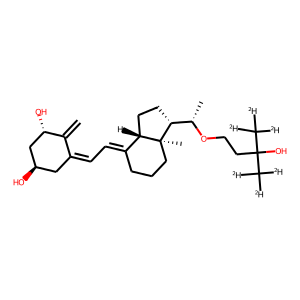

In [34]:
string = '[2H]C([2H])([2H])C(O)(CCO[C@@H](C)[C@H]1CC[C@H]2/C(=C/C=C3/C[C@@H](O)C[C@H](O)C3=C)CCC[C@]12C)C([2H])([2H])[2H]'
mol = Chem.MolFromSmiles(string)
MolToImage(mol)